In [41]:
from sklearn.datasets import make_moons, make_blobs, make_classification
import seaborn as sns

In [57]:
X,y = make_blobs(n_features=2, centers=6 , center_box = (0 , 1) , cluster_std=0.05,)

D:\anaconda3\envs\nlp38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

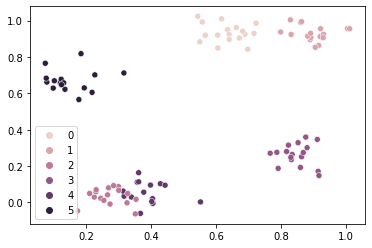

In [58]:
sns.scatterplot(X[:,0],X[:,1] , hue = y)